## Financial Dataset: FR - Y 9C

### Import Libraries:

In [1]:
import os ## System Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb
import matplotlib.dates as mdates

### Read and combine the txt files:

In [2]:
# Path to the folder containing the text files
folder_path = r"D:\Boot Camp\Project Federal Reserve\Financial Data Download 2004-2024"

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] ## List Comprehension

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append the DataFrame to the list
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHCANC99,BHCKFT42,BHCKFT43,BHCKFT44,BHSPFT42,BHSPFT43,BHSPFT44,BHSPMZ36,BHSPNK60,BHCKMG95
0,1020180,20040331,20020401,20040822,551111,9,11.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20040331,20001028,20051230,551111,2,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020340,20040331,20040301,20040531,551111,7,29.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020395,20040331,20040211,20081230,551111,6,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020582,20040331,19980101,20060228,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
combined_df.shape

(243757, 3099)

### Subset of Columns:

In [4]:
smalldf = combined_df[['RSSD9001', 'RSSD9007', 'RSSD9017', 'RSSD9032', 'RSSD9146', 'RSSD9999', 'BHCK2170', 'BHCK4107', 'BHCK4073', 'BHCK4079', 'BHCK4093']]
smalldf.head()

,RSSD9001,RSSD9007,RSSD9017,RSSD9032,RSSD9146,RSSD9999,BHCK2170,BHCK4107,BHCK4073,BHCK4079,BHCK4093
0,1020180,20020401,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0,21389.0,17200.0,41353.0
1,1020201,20001028,HSBC USA INC.,2,1.0,20040331,102501934.0,883035.0,228313.0,287858.0,489393.0
2,1020340,20040301,"HARRIS BANKCORP, INC.",7,29.0,20040331,32344528.0,276513.0,73178.0,122248.0,221779.0
3,1020395,20040211,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,217529.0,2980.0,1152.0,310.0,1128.0
4,1020582,19980101,"WCN BANCORP, INC.",7,1.0,20040331,240470.0,2692.0,677.0,398.0,1204.0


In [5]:
name_dict = {'RSSD9001':'RSSD ID',
             'RSSD9007':'Start Date',
             'RSSD9008':'End Date',
             'RSSD9017':'Firm Legal Name',
             'RSSD9032':'FR District Code',
             'RSSD9146':'Bank Count',
             'RSSD9999':'Reporting Date',
             'BHCK2170':'Total Assets', 
             'BHCK4073':'Interest Expense',
             'BHCK4107':'Interest Income',
             'BHCK4079':'Non-Interest Income',
             'BHCK4093':'Non-Interest Expense'}
smalldf = smalldf.rename(columns = name_dict)
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,Non-Interest Expense
0,1020180,20020401,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0,21389.0,17200.0,41353.0
1,1020201,20001028,HSBC USA INC.,2,1.0,20040331,102501934.0,883035.0,228313.0,287858.0,489393.0
2,1020340,20040301,"HARRIS BANKCORP, INC.",7,29.0,20040331,32344528.0,276513.0,73178.0,122248.0,221779.0
3,1020395,20040211,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,217529.0,2980.0,1152.0,310.0,1128.0
4,1020582,19980101,"WCN BANCORP, INC.",7,1.0,20040331,240470.0,2692.0,677.0,398.0,1204.0


In [6]:
smalldf.shape

(243757, 11)

### Change Date Format:

In [7]:


smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'], format = "%Y%m%d")
smalldf['Start Date'] = pd.to_datetime(smalldf['Start Date'], format = "%Y%m%d")
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,Non-Interest Expense
0,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,5721282.0,68233.0,21389.0,17200.0,41353.0
1,1020201,2000-10-28,HSBC USA INC.,2,1.0,2004-03-31,102501934.0,883035.0,228313.0,287858.0,489393.0
2,1020340,2004-03-01,"HARRIS BANKCORP, INC.",7,29.0,2004-03-31,32344528.0,276513.0,73178.0,122248.0,221779.0
3,1020395,2004-02-11,SOUTHERN NATIONAL CORPORATION,6,1.0,2004-03-31,217529.0,2980.0,1152.0,310.0,1128.0
4,1020582,1998-01-01,"WCN BANCORP, INC.",7,1.0,2004-03-31,240470.0,2692.0,677.0,398.0,1204.0


### Define Quarters and Year:

In [8]:
# Define Quarter

smalldf['Quarter'] = smalldf['Reporting Date'].dt.quarter
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,Non-Interest Expense,Quarter
0,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,5721282.0,68233.0,21389.0,17200.0,41353.0,1
1,1020201,2000-10-28,HSBC USA INC.,2,1.0,2004-03-31,102501934.0,883035.0,228313.0,287858.0,489393.0,1
2,1020340,2004-03-01,"HARRIS BANKCORP, INC.",7,29.0,2004-03-31,32344528.0,276513.0,73178.0,122248.0,221779.0,1
3,1020395,2004-02-11,SOUTHERN NATIONAL CORPORATION,6,1.0,2004-03-31,217529.0,2980.0,1152.0,310.0,1128.0,1
4,1020582,1998-01-01,"WCN BANCORP, INC.",7,1.0,2004-03-31,240470.0,2692.0,677.0,398.0,1204.0,1


In [9]:
# Define Year

smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,Non-Interest Expense,Quarter,Year
0,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004
1,1020201,2000-10-28,HSBC USA INC.,2,1.0,2004-03-31,102501934.0,883035.0,228313.0,287858.0,489393.0,1,2004
2,1020340,2004-03-01,"HARRIS BANKCORP, INC.",7,29.0,2004-03-31,32344528.0,276513.0,73178.0,122248.0,221779.0,1,2004
3,1020395,2004-02-11,SOUTHERN NATIONAL CORPORATION,6,1.0,2004-03-31,217529.0,2980.0,1152.0,310.0,1128.0,1,2004
4,1020582,1998-01-01,"WCN BANCORP, INC.",7,1.0,2004-03-31,240470.0,2692.0,677.0,398.0,1204.0,1,2004


### Quarterization:

##### Definition of Quarterization function

In [10]:
def quarterize(df, cols_to_process, dt_column):
  """
  Function to quarterizes the columns of a dataframe.
    df: has to be sorted by year and quarters
    cols_to_process: list of columns to quarterize
    dt_column: string
              column name of the date column

  """
  # indices is considered to be default
  fq_ids = df[(df[dt_column].dt.month == 3) & (df[dt_column].dt.day == 31)].index
  for col in cols_to_process:
    df[f"Q{col}"] = df[col].diff()
    df.loc[fq_ids, f"Q{col}"] = df.loc[fq_ids, col]
  return df

##### Quarterization of Components

In [11]:
ls_dfs = []
for bank in smalldf['RSSD ID'].unique():
  OneBank = smalldf[smalldf["RSSD ID"] == bank].sort_values(by=['Reporting Date'])
  tmp_df = quarterize(OneBank, ["Interest Income", "Interest Expense", "Non-Interest Income", "Non-Interest Expense"], dt_column="Reporting Date")
  ls_dfs.append(tmp_df)

Quarterized_dfs = pd.concat(ls_dfs, ignore_index=True)
Quarterized_dfs.head(1000)


,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,Non-Interest Expense,Quarter,Year,QInterest Income,QInterest Expense,QNon-Interest Income,QNon-Interest Expense
0,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004,68233.0,21389.0,17200.0,41353.0
1,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30,5870480.0,138086.0,42634.0,35351.0,84535.0,2,2004,69853.0,21245.0,18151.0,43182.0
2,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30,5963700.0,212489.0,65175.0,53242.0,127342.0,3,2004,74403.0,22541.0,17891.0,42807.0
3,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31,6141519.0,291916.0,88839.0,72570.0,172413.0,4,2004,79427.0,23664.0,19328.0,45071.0
4,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31,6230236.0,81656.0,27019.0,17515.0,44033.0,1,2005,81656.0,27019.0,17515.0,44033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1023172,2008-12-31,"NORTH MISSOURI BANCORP, INC.",8,1.0,2010-06-30,NaN,NaN,NaN,NaN,NaN,2,2010,NaN,NaN,NaN,NaN
996,1023172,2008-12-31,"NORTH MISSOURI BANCORP, INC.",8,1.0,2010-12-31,NaN,NaN,NaN,NaN,NaN,4,2010,NaN,NaN,NaN,NaN
997,1023172,2008-12-31,"NORTH MISSOURI BANCORP, INC.",8,1.0,2011-06-30,NaN,NaN,NaN,NaN,NaN,2,2011,NaN,NaN,NaN,NaN
998,1023172,2008-12-31,"NORTH MISSOURI BANCORP, INC.",8,1.0,2011-12-31,NaN,NaN,NaN,NaN,NaN,4,2011,NaN,NaN,NaN,NaN


### Normalization:

In [12]:
# Normalize Components
Quarterized_dfs['Normalized Interest Income per Quarter'] = Quarterized_dfs['QInterest Income']/Quarterized_dfs['Total Assets']

Quarterized_dfs['Normalized Interest Expense per Quarter'] = Quarterized_dfs['QInterest Expense']/Quarterized_dfs['Total Assets']

Quarterized_dfs['Normalized Non-Interest Income per Quarter'] = Quarterized_dfs['QNon-Interest Income']/Quarterized_dfs['Total Assets']

Quarterized_dfs['Normalized Non-Interest Expense per Quarter'] = Quarterized_dfs['QNon-Interest Expense']/Quarterized_dfs['Total Assets']

Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income,Interest Expense,Non-Interest Income,...,Quarter,Year,QInterest Income,QInterest Expense,QNon-Interest Income,QNon-Interest Expense,Normalized Interest Income per Quarter,Normalized Interest Expense per Quarter,Normalized Non-Interest Income per Quarter,Normalized Non-Interest Expense per Quarter
0,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31,5721282.0,68233.0,21389.0,17200.0,...,1,2004,68233.0,21389.0,17200.0,41353.0,0.011926,0.003738,0.003006,0.007228
1,1020180,2002-04-01,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30,5870480.0,138086.0,42634.0,35351.0,...,2,2004,69853.0,21245.0,18151.0,43182.0,0.011899,0.003619,0.003092,0.007356
2,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30,5963700.0,212489.0,65175.0,53242.0,...,3,2004,74403.0,22541.0,17891.0,42807.0,0.012476,0.003780,0.003000,0.007178
3,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31,6141519.0,291916.0,88839.0,72570.0,...,4,2004,79427.0,23664.0,19328.0,45071.0,0.012933,0.003853,0.003147,0.007339
4,1020180,2004-08-23,BREMER FINANCIAL CORPORATION,9,10.0,2005-03-31,6230236.0,81656.0,27019.0,17515.0,...,1,2005,81656.0,27019.0,17515.0,44033.0,0.013106,0.004337,0.002811,0.007068


## US Department of Treasury Dataset - To pull out Macrovariables

In [13]:
rates_df = pd.read_csv("D:\Downloads\yield-curve-rates-2004-2024.csv")
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,07/15/24,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,07/12/24,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,07/11/24,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,07/10/24,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,07/09/24,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [14]:
rates_df.shape

(5139, 14)

In [15]:
# Changing Date to Date-time Format
rates_df['Date'] = pd.to_datetime(rates_df['Date'], format = '%m/%d/%y')
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-15,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,2024-07-12,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,2024-07-11,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,2024-07-10,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,2024-07-09,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [16]:
# Giving the Year and Quarter each entry
rates_df['Year'] = rates_df['Date'].dt.year
rates_df['Quarter'] = rates_df['Date'].dt.quarter
rates_df.sort_values('Date').head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
5138,2004-01-02,0.88,NaN,0.93,NaN,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,NaN,2004,1
5137,2004-01-05,0.88,NaN,0.91,NaN,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,NaN,2004,1
5136,2004-01-06,0.88,NaN,0.91,NaN,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,NaN,2004,1
5135,2004-01-07,0.88,NaN,0.91,NaN,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,NaN,2004,1
5134,2004-01-08,0.87,NaN,0.88,NaN,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,NaN,2004,1


In [17]:
rates_df.shape

(5139, 16)

In [18]:
finalrates = rates_df.groupby(['Year', 'Quarter']).mean().reset_index()
finalrates['Date'] = pd.to_datetime(finalrates['Year'].astype(str) + 'Q' + finalrates['Quarter'].astype(str))
finalrates.tail(20)

C:\Users\huang\AppData\Local\Temp\ipykernel_23112\980698652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  finalrates = rates_df.groupby(['Year', 'Quarter']).mean().reset_index()


,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Date
63,2019,4,1.623065,1.616935,1.607581,NaN,1.613548,1.575806,1.591129,1.589677,1.613387,1.712903,1.791935,2.094355,2.254355,2019-10-01
64,2020,1,1.133871,1.130161,1.104032,NaN,1.097581,1.067742,1.081452,1.093387,1.144839,1.278548,1.365000,1.700000,1.870806,2020-01-01
65,2020,2,0.113333,0.131270,0.142222,NaN,0.167937,0.174286,0.193651,0.240794,0.357460,0.542063,0.687619,1.153968,1.380794,2020-04-01
66,2020,3,0.092813,0.104688,0.113437,NaN,0.126719,0.134688,0.140937,0.164531,0.271719,0.462344,0.650625,1.144531,1.362969,2020-07-01
67,2020,4,0.083065,0.088065,0.092903,NaN,0.102742,0.114516,0.149677,0.196452,0.369516,0.615645,0.864516,1.404032,1.619032,2020-10-01
68,2021,1,0.044098,0.047049,0.051148,NaN,0.066230,0.082459,0.132131,0.247869,0.618033,1.001475,1.335902,1.936721,2.086557,2021-01-01
69,2021,2,0.017344,0.020469,0.025156,NaN,0.041719,0.059688,0.174219,0.354063,0.840625,1.273281,1.590781,2.167344,2.257969,2021-04-01
70,2021,3,0.048125,0.051875,0.049688,NaN,0.053750,0.075469,0.225781,0.431250,0.799687,1.099063,1.324844,1.857187,1.931406,2021-07-01
71,2021,4,0.054355,0.057903,0.054194,NaN,0.095000,0.200323,0.531774,0.818548,1.180968,1.414677,1.533387,1.965000,1.944355,2021-10-01
72,2022,1,0.093226,0.186290,0.309355,NaN,0.618065,0.980323,1.464516,1.682581,1.833871,1.933548,1.951129,2.334032,2.258387,2022-01-01


In [19]:
finalrates.shape

# 83 quarters = 20 years 2004-2023 * 4 quarters + 3 quarters in 2024
# 13 variables about rates

(83, 16)

# Data Visualization

### Daily Treasury Curve

### From Chatgpt:

The importance of different Treasury rates can depend on the context and the financial instruments or decisions involved. However, some Treasury rates are generally considered more significant due to their broader economic implications and their use as benchmarks:

1. **10-Year Treasury Yield**: 
   - **Significance**: Often regarded as a key indicator of investor sentiment and economic health. It's widely used as a benchmark for mortgage rates and other long-term loans.
   - **Impact**: Movements in the 10-year yield can influence borrowing costs for consumers and businesses, affecting spending and investment decisions.

2. **2-Year Treasury Yield**: 
   - **Significance**: Closely watched as a gauge of Federal Reserve monetary policy expectations. Changes in the 2-year yield can reflect market expectations for future interest rate movements.
   - **Impact**: It's often used to understand short-term economic outlooks and the stance of monetary policy.

3. **30-Year Treasury Yield**: 
   - **Significance**: Important for long-term investments and planning, such as retirement funds and insurance companies. It reflects long-term economic growth expectations and inflation.
   - **Impact**: Affects the pricing of long-term loans, mortgages, and other financial products.

4. **5-Year Treasury Yield**: 
   - **Significance**: A middle ground between short-term and long-term rates, providing insights into medium-term economic conditions and expectations.
   - **Impact**: Influences intermediate-term loans and financing.

5. **3-Month Treasury Bill Rate**: 
   - **Significance**: Viewed as a safe haven and a benchmark for short-term interest rates. It's often used in calculating discount rates and as a reference for money market instruments.
   - **Impact**: Reflects liquidity conditions and short-term interest rate expectations.

### Key Points of Interest:

- **Yield Curve**: The relationship between short-term and long-term Treasury yields, which can signal economic conditions. A normal upward-sloping yield curve indicates healthy economic growth, while an inverted yield curve can signal a potential recession.
- **Inflation Expectations**: Treasury rates can provide insights into market expectations for inflation, with higher rates often indicating higher inflation expectations.
- **Federal Reserve Policy**: The Fed's actions, such as rate hikes or cuts, directly influence short-term Treasury yields and can also affect longer-term yields through expectations and market reactions.

Each Treasury rate serves a different purpose and offers unique insights into various aspects of the economy and financial markets. Understanding the context and the specific financial decision at hand is crucial in determining which Treasury rate is most important.

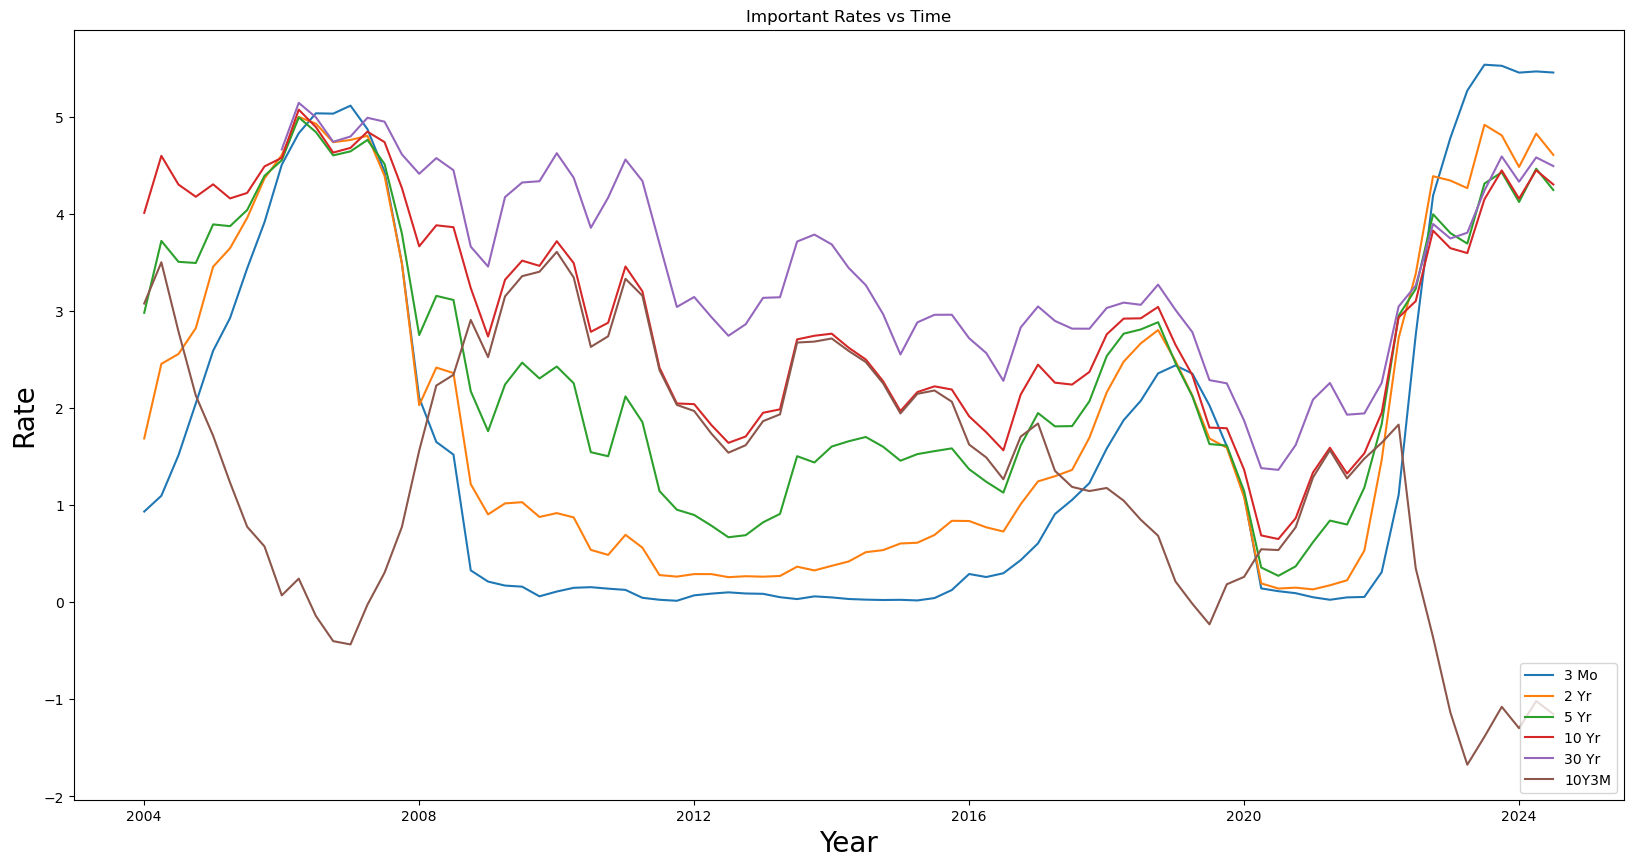

In [20]:
# plot the rates

# Need a large figure
fic = plt.subplots(figsize = (20,10))

# Plot fewer but more important rates
for rate in ['3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[rate])

# Plot 10-year minus 3-month rate
plt.plot(finalrates['Date'], finalrates['10 Yr'] - finalrates['3 Mo'])

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('Important Rates vs Time')

# Color the curves
plt.gca().legend(('3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr', '10Y3M'), loc = 'lower right')

Text(0.5, 1.0, 'When 10-year minus 3-month < 0')

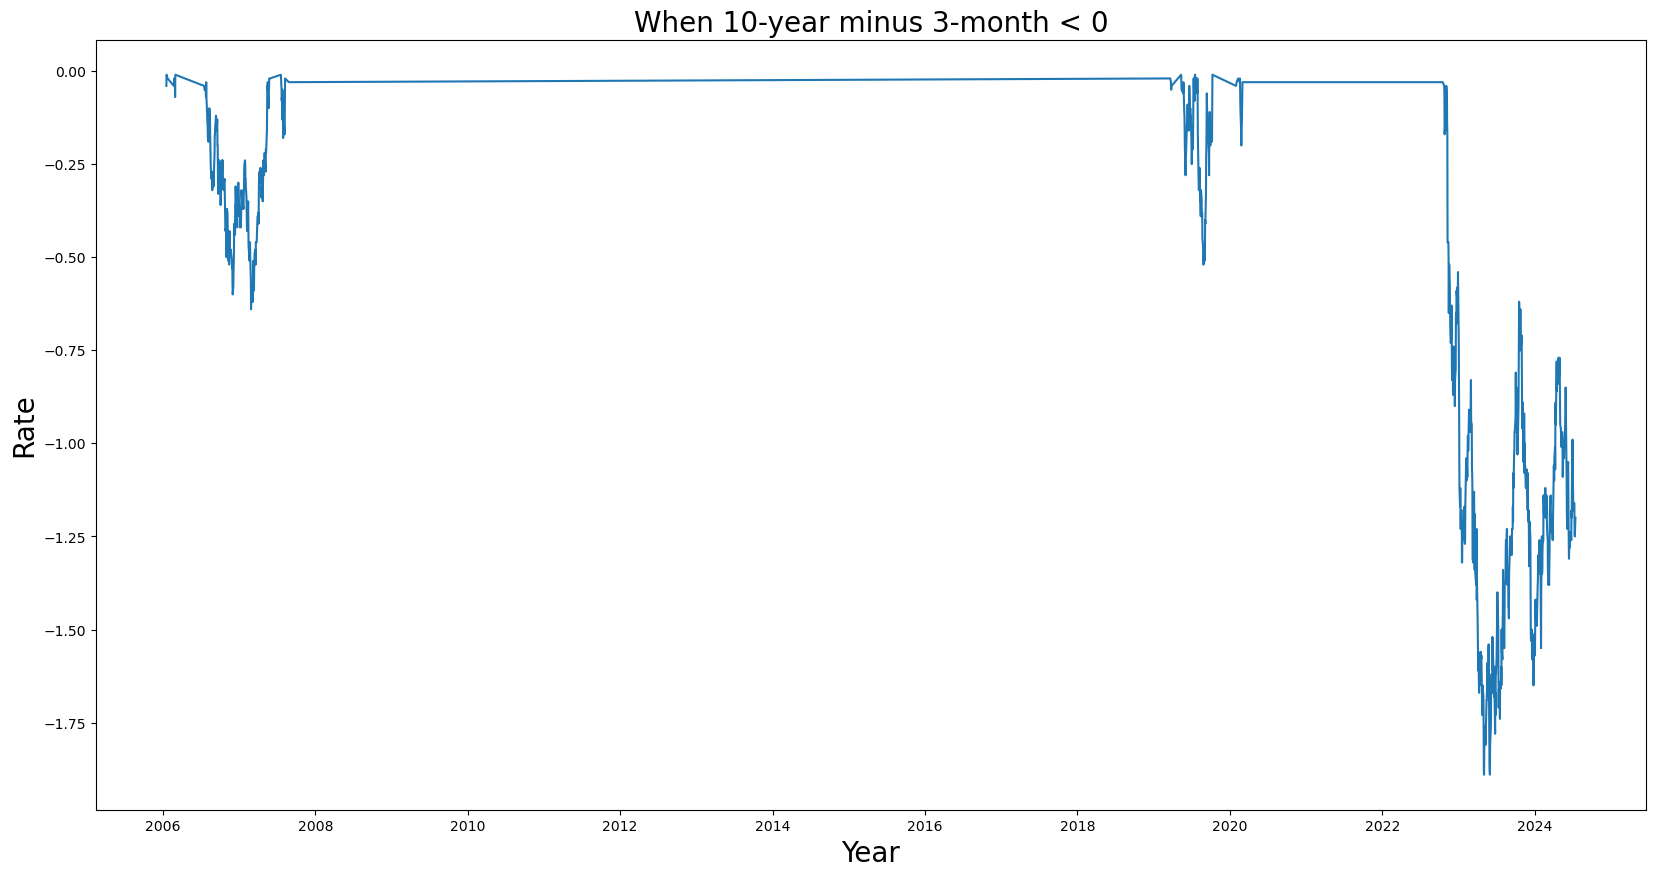

In [21]:
# Plot 10-year minus 3-month when 3-month > 10-year

filtered_rates = rates_df[rates_df['10 Yr'] < rates_df['3 Mo']]

# Need a large figure
fic = plt.subplots(figsize = (20,10))

plt.plot(filtered_rates['Date'], filtered_rates['10 Yr'] - filtered_rates['3 Mo'])

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('When 10-year minus 3-month < 0', fontsize = 20)

### Observations on Treasury Rates

1. **Trend of All Treasury Rates are similar**

2. **Trends clearly show the periods of 2008 financial crisis, covid pandemic, and post-pandemic era**

3. **Longer-term treasury rate are usually more than shorter-term treasury rate. For example, 10-Year rate is usually greater than 3-month rate, except a period before 2008, and the post-pandemic era**

### GDP Curve

In [22]:
gdp_df = pd.read_csv(r"D:\Downloads\GDP.csv")

gdp_df.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [23]:
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])

# Determine periods where GDP is decreasing
gdp_df['Decrease'] = gdp_df['GDP'].diff().shift(-1) < 0

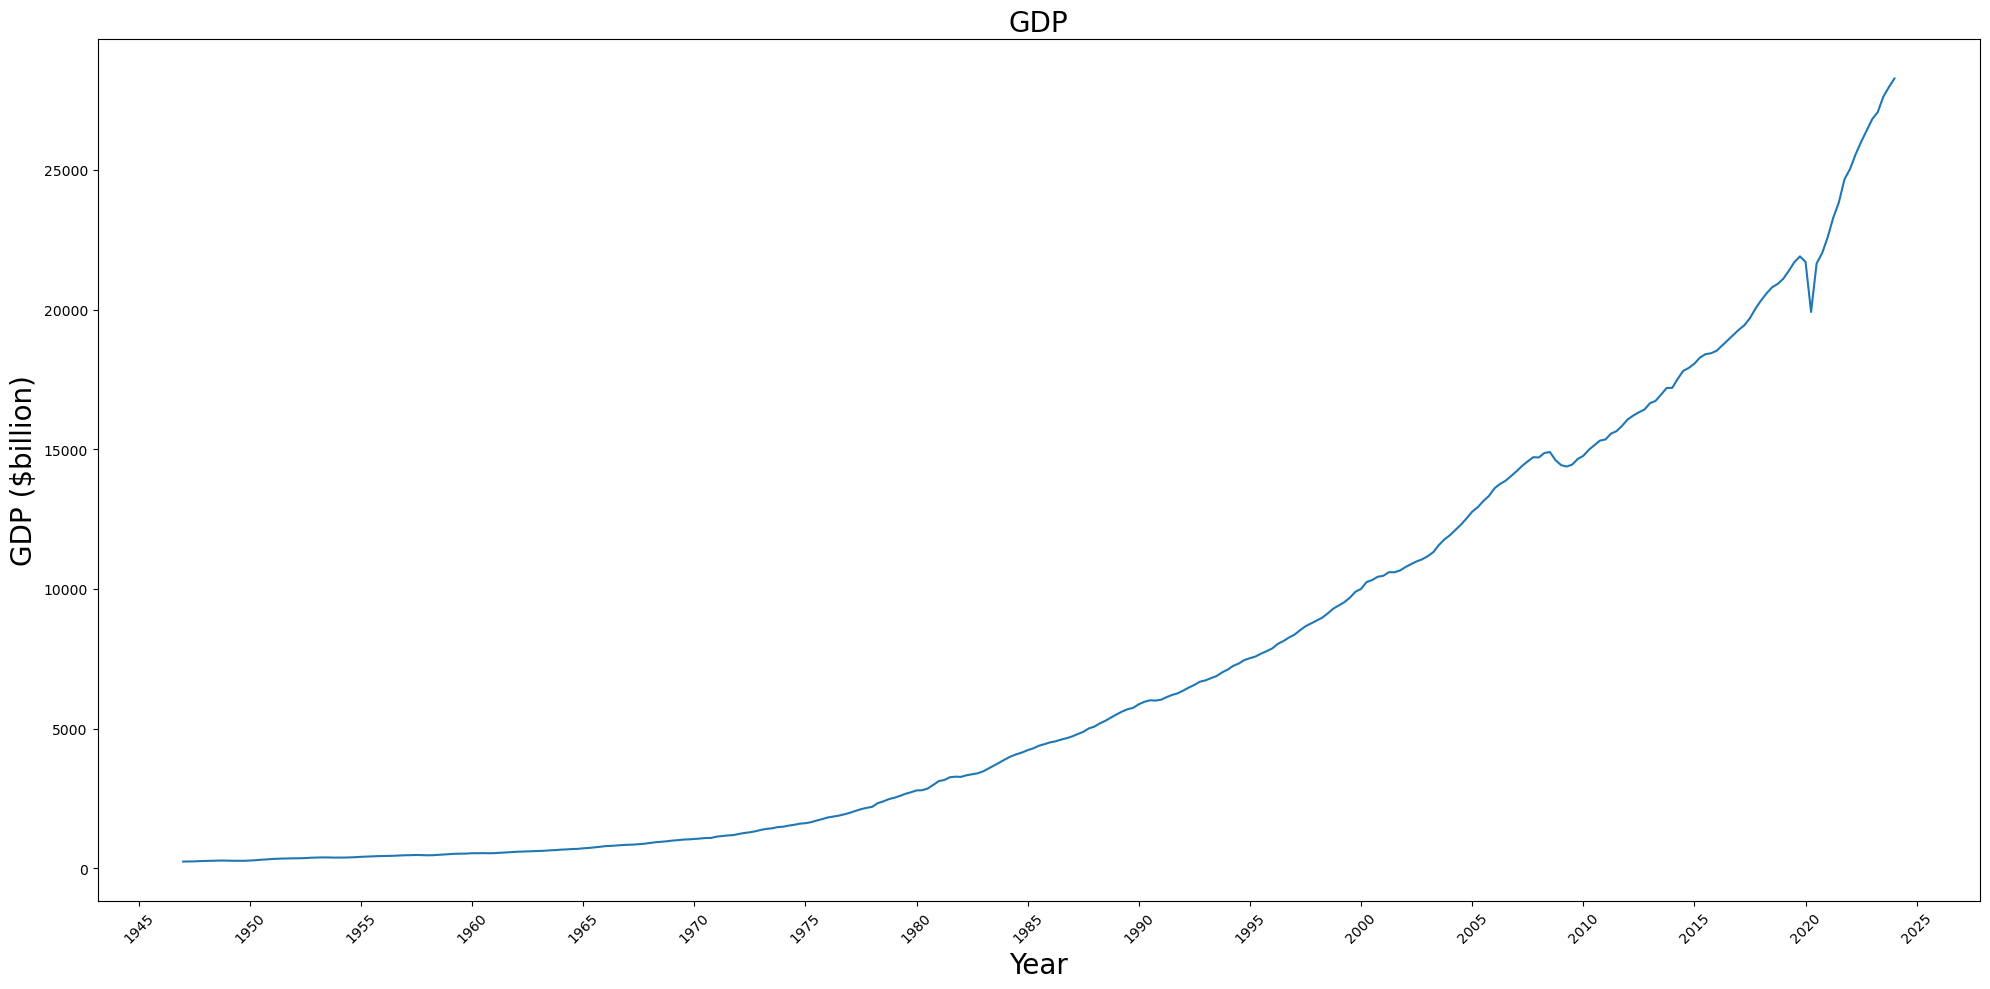

In [24]:
# Need a large figure
fic = plt.subplots(figsize = (20,10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

plt.plot(gdp_df['DATE'], gdp_df['GDP'])

plt.xlabel('Year', fontsize = 20)
plt.ylabel('GDP ($billion)', fontsize = 20)
plt.title('GDP', fontsize = 20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
gdp_after2000 = gdp_df[gdp_df['DATE'] >= '2000-01-01']
gdp_after2000.head()

,DATE,GDP,Decrease
212,2000-01-01,10002.179,False
213,2000-04-01,10247.720,False
214,2000-07-01,10318.165,False
215,2000-10-01,10435.744,False
216,2001-01-01,10470.231,False


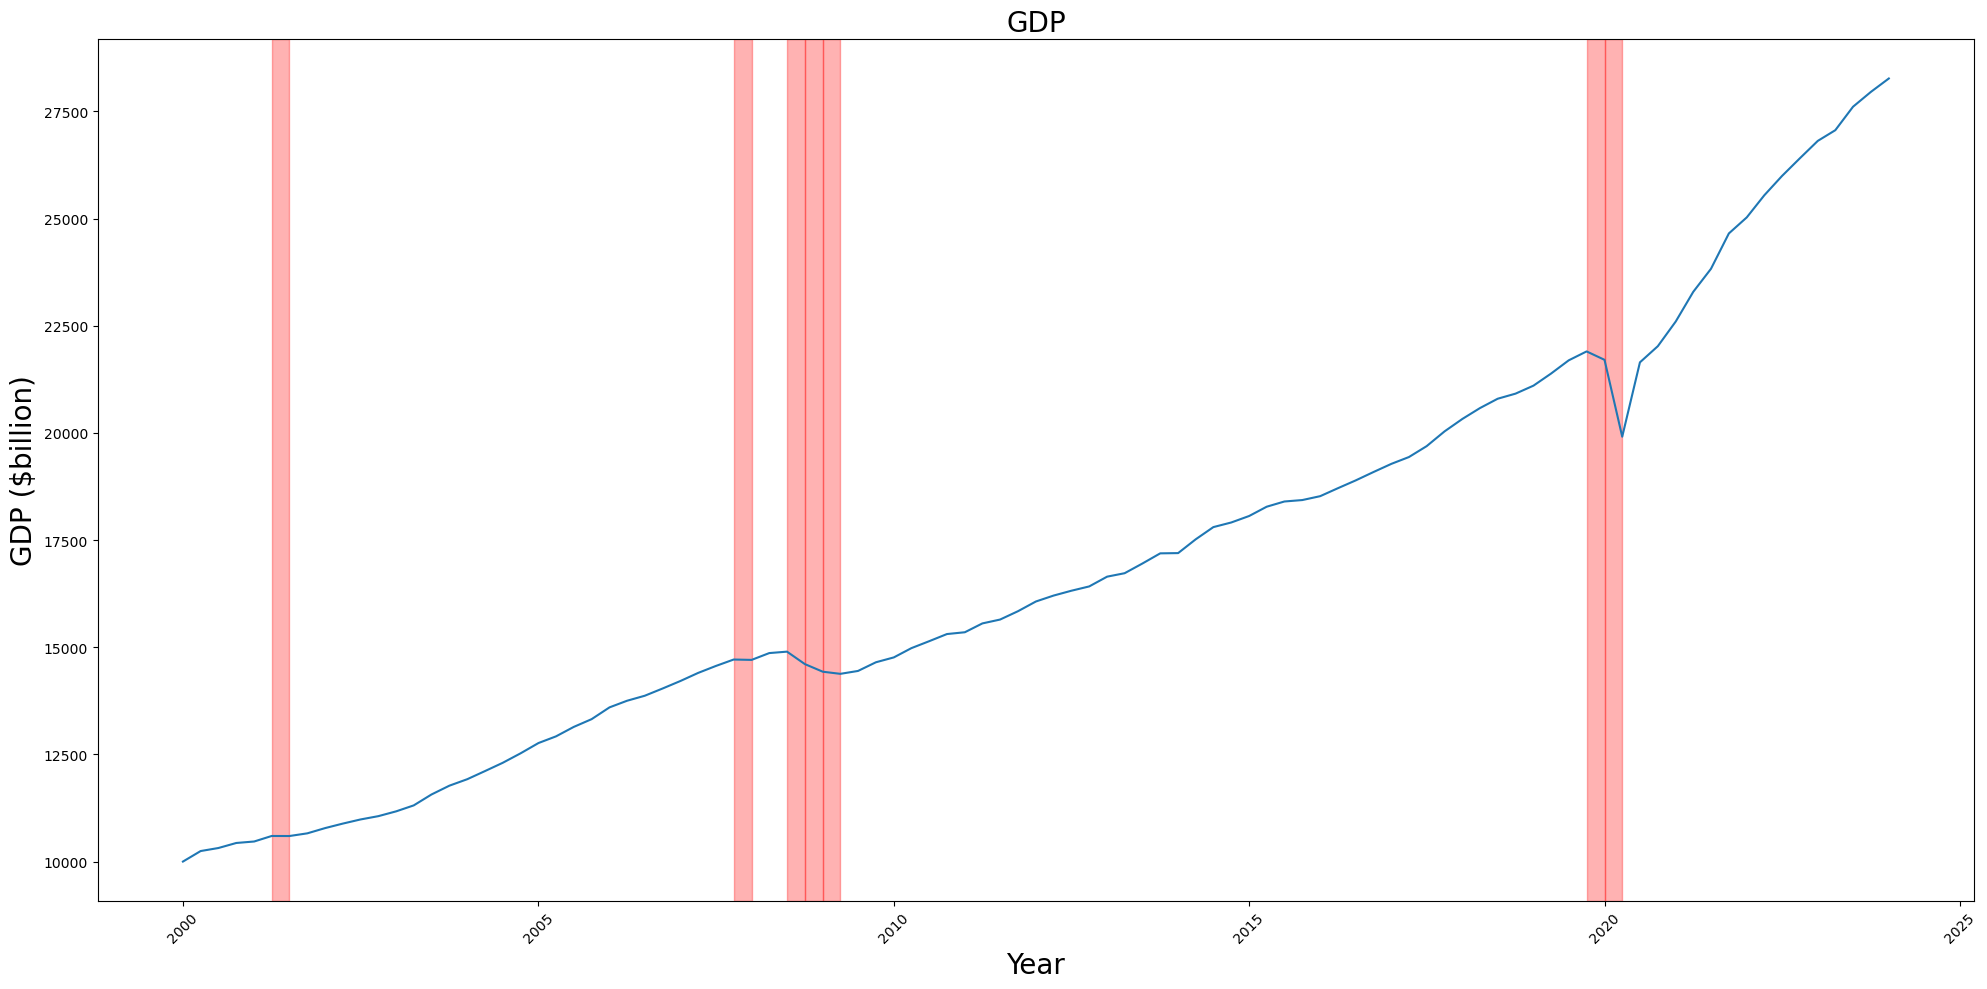

In [26]:
# Need a large figure
fic = plt.subplots(figsize = (20,10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

plt.plot(gdp_after2000['DATE'], gdp_after2000['GDP'])

# Highlight decreasing periods
for i in range(len(gdp_after2000) - 1):
    if gdp_after2000['Decrease'].iloc[i]:
        plt.axvspan(gdp_after2000['DATE'].iloc[i], gdp_after2000['DATE'].iloc[i + 1], color='red', alpha=0.3)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('GDP ($billion)', fontsize = 20)
plt.title('GDP', fontsize = 20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Possible Reasons for GDP decrease:
1. 911 event
2. 2008 crisis
3. COVID pandemic